In [140]:
import pandas as pd 
import numpy as np
df=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Summer Intern ISI\Summer-Intern-ISI\FMCG_data.csv")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [141]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [142]:
df.tail()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093
24999,WH_124999,EID_74999,Rural,Mid,West,Zone 4,8,2,4,5664,...,1,239,39.0,2019.0,4,0,B+,2,11,5058


In [143]:
df.duplicated().sum()

0

In [144]:
df["WH_regional_zone"].unique()

array(['Zone 6', 'Zone 5', 'Zone 2', 'Zone 3', 'Zone 1', 'Zone 4'],
      dtype=object)

In [145]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [146]:
df.shape

(25000, 24)

In [147]:
df.drop(columns=["wh_est_year"],inplace=True)

In [148]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.0,18,0,C,6,24,24071


<Axes: xlabel='workers_num'>

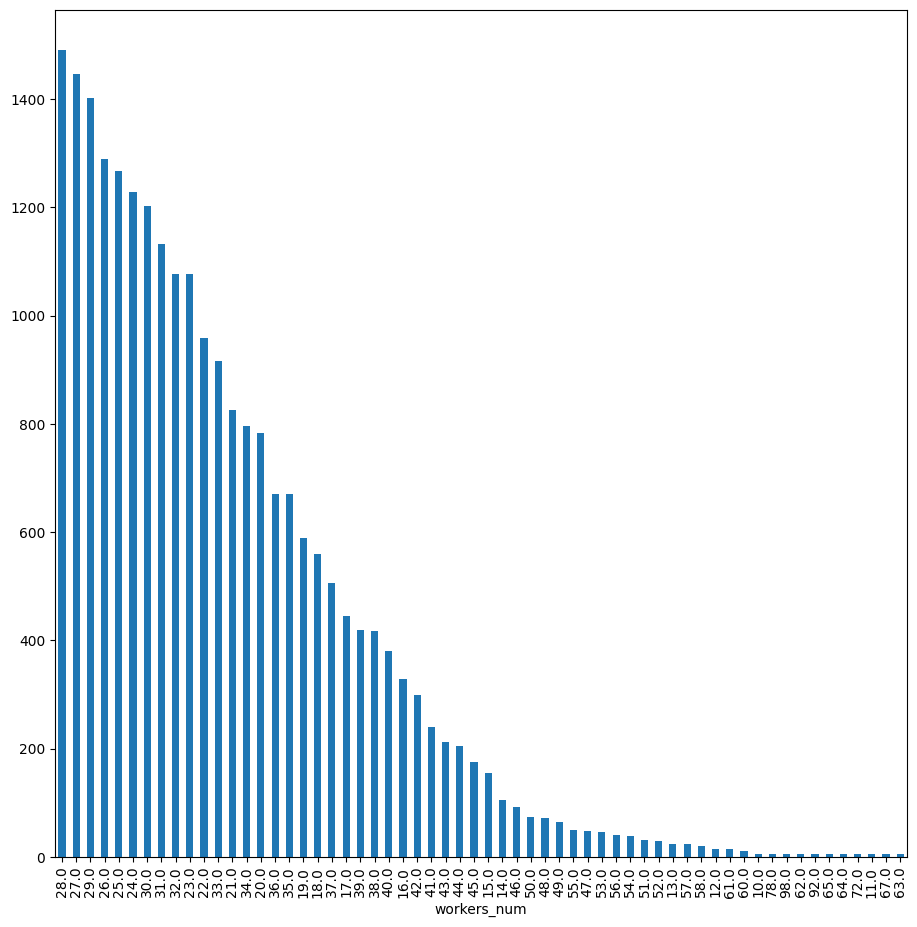

In [149]:
plt.figure(figsize=(11,11))

df['workers_num'].value_counts().plot(kind="bar")

In [150]:
df['workers_num'].fillna(df['workers_num'].mode()[0], inplace=True)


C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_12360\178116342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workers_num'].fillna(df['workers_num'].mode()[0], inplace=True)


In [151]:
df.isnull().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

<Axes: xlabel='approved_wh_govt_certificate'>

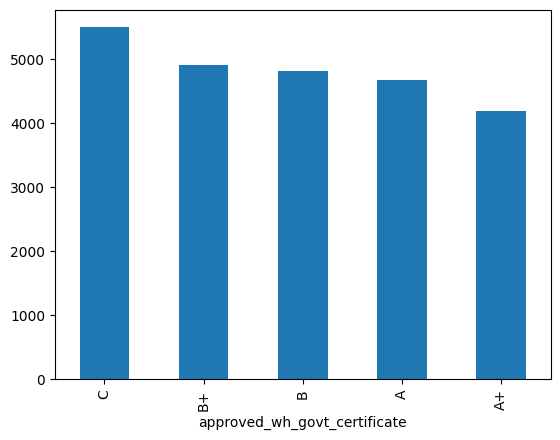

In [152]:
df['approved_wh_govt_certificate'].value_counts().plot(kind="bar")

In [153]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_12360\3710431614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)


In [154]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [155]:
df[['approved_wh_govt_certificate']]

,approved_wh_govt_certificate
0,A
1,A
2,A
3,A+
4,C
...,...
24995,A
24996,B
24997,B+
24998,A


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [157]:
for i in df.columns:
    if df[i].dtype=="object":
        print(i)

Ware_house_ID
WH_Manager_ID
Location_type
WH_capacity_size
zone
WH_regional_zone
wh_owner_type
approved_wh_govt_certificate


In [158]:
df.shape

(25000, 23)

In [159]:
df.drop(columns=["Ware_house_ID","WH_Manager_ID"],inplace=True)

In [160]:
df.shape

(25000, 21)

In [161]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [162]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [163]:
df[["flood_impacted"]]

,flood_impacted
0,0
1,0
2,0
3,0
4,1
...,...
24995,0
24996,0
24997,1
24998,0


In [164]:
df["WH_capacity_size"].unique()

array(['Small', 'Large', 'Mid'], dtype=object)

In [165]:
df["Location_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [166]:
df["Location_type"]=df["Location_type"].map({"Rural":0,"Urban":1})

In [167]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,0,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,0,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,0,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,0,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [168]:
df["Location_type"].value_counts()

Location_type
0    22957
1     2043
Name: count, dtype: int64

In [169]:
df["WH_capacity_size"]=df["WH_capacity_size"].map({"Small":0,"Mid":1,"Large":2})

In [170]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,0,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,0,2,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,0,1,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,0,1,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,0,2,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [171]:
df["wh_owner_type"].unique()

array(['Rented', 'Company Owned'], dtype=object)

In [172]:
df["wh_owner_type"]=df["wh_owner_type"].map({"Rented":0,"Company Owned":1})

In [173]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,0,West,Zone 6,3,1,2,4651,0,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,0,2,North,Zone 5,0,0,4,6217,1,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,0,1,South,Zone 2,1,0,4,4306,1,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,0,1,North,Zone 3,7,4,2,6000,0,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,0,2,North,Zone 5,3,1,2,4740,1,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [174]:
df["wh_owner_type"]

0        0
1        1
2        1
3        0
4        1
        ..
24995    0
24996    1
24997    0
24998    0
24999    1
Name: wh_owner_type, Length: 25000, dtype: int64

In [175]:
df["approved_wh_govt_certificate"].unique()

array(['A', 'A+', 'C', 'B', 'B+'], dtype=object)

In [176]:
df["approved_wh_govt_certificate"]=df["approved_wh_govt_certificate"].map({"C":0,"B":1,"B+":2,"A":3,"A+":4})

In [177]:
df[["approved_wh_govt_certificate"]]

,approved_wh_govt_certificate
0,3
1,3
2,3
3,4
4,0
...,...
24995,3
24996,1
24997,2
24998,3


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int64  
 1   WH_capacity_size              25000 non-null  int64  
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int64  
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [179]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,0,West,Zone 6,3,1,2,4651,0,24,...,1,1,91,29.0,13,0,3,5,15,17115
1,0,2,North,Zone 5,0,0,4,6217,1,47,...,0,1,210,31.0,4,0,3,3,17,5074
2,0,1,South,Zone 2,1,0,4,4306,1,64,...,0,0,161,37.0,17,0,3,6,22,23137
3,0,1,North,Zone 3,7,4,2,6000,0,50,...,0,0,103,21.0,17,1,4,3,27,22115
4,0,2,North,Zone 5,3,1,2,4740,1,42,...,0,1,112,25.0,18,0,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,North,Zone 1,3,0,4,5390,0,19,...,0,1,142,34.0,22,1,3,2,30,32093
24996,0,1,West,Zone 2,6,0,4,4490,1,57,...,0,1,130,28.0,10,0,1,4,18,12114
24997,1,2,South,Zone 5,7,0,2,5403,0,31,...,0,1,147,28.0,23,0,2,5,25,27080
24998,0,0,North,Zone 1,1,0,2,10562,0,25,...,0,1,60,25.0,18,0,3,6,30,25093


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int64  
 1   WH_capacity_size              25000 non-null  int64  
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int64  
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [181]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: >

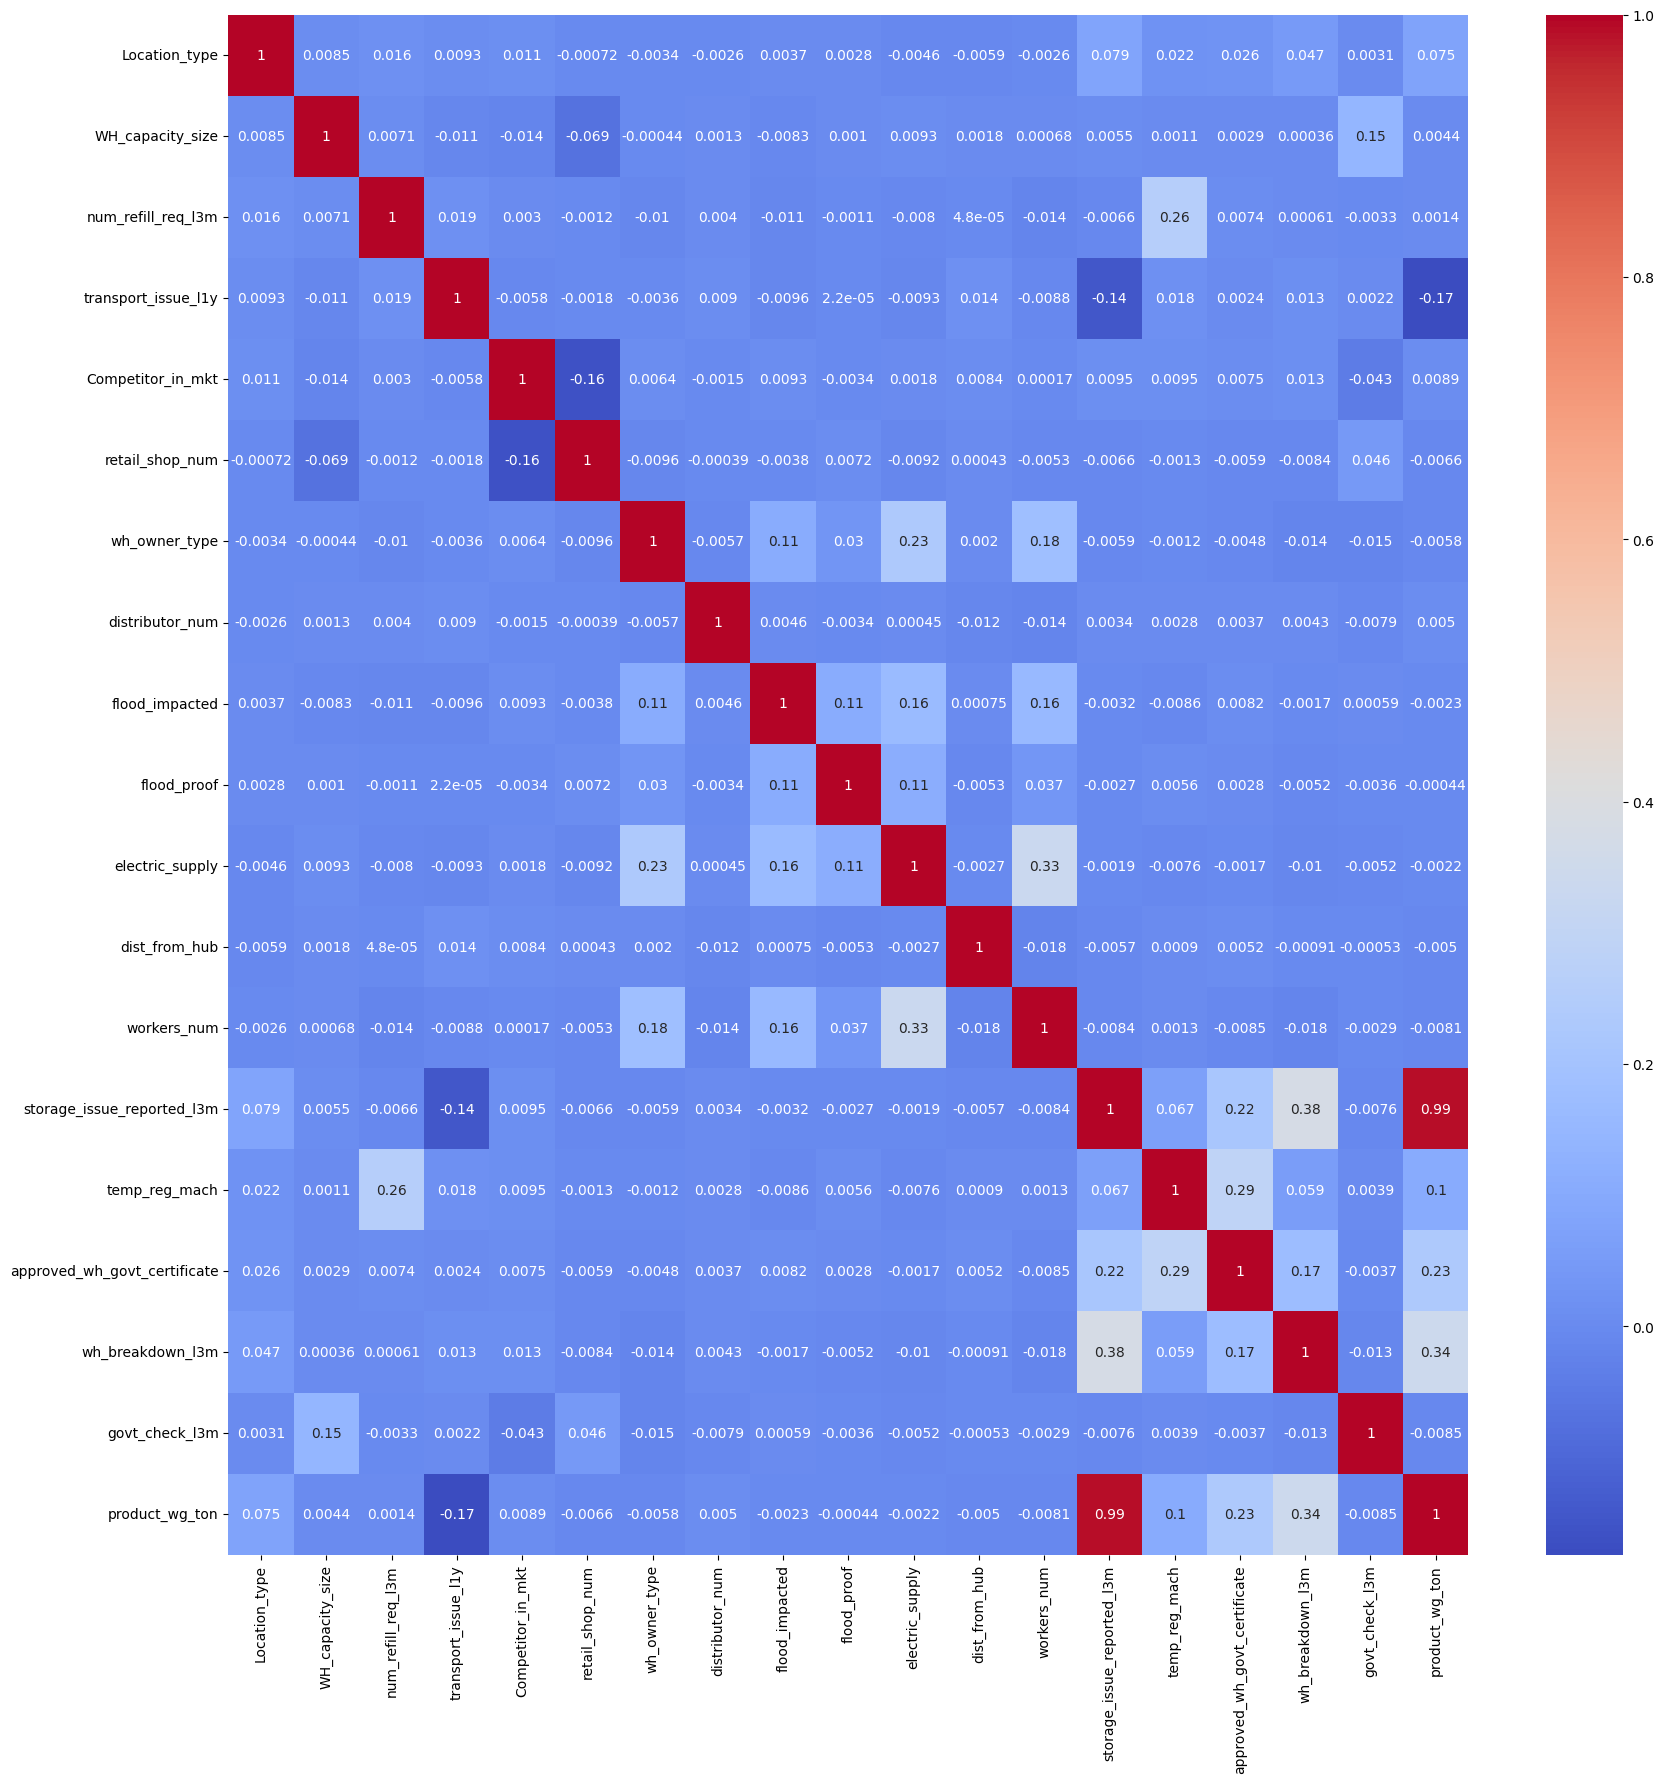

In [212]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True)

In [213]:
sns.pairplot(df)

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [183]:
transformer=ColumnTransformer(
    transformers=[
        ("OHE",OneHotEncoder(sparse_output=False, drop="first"), ["zone","WH_regional_zone"])
    ],remainder="passthrough"
)

In [193]:
X_train=transformer.fit_transform(X_train)
X_test=transformer.transform(X_test)

In [194]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [195]:
lr.fit(X_train,y_train)

LinearRegression()

In [200]:
from sklearn.metrics import r2_score

In [201]:
y_pred=lr.predict(X_test)

In [203]:
r2_score(y_test,y_pred)

0.9767667582544461

In [204]:
from xgboost import XGBRegressor

In [205]:
xgb=XGBRegressor()

In [206]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [207]:
xgb.score(X_test,y_test)

0.993506133556366

In [208]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)


DecisionTreeRegressor()

In [209]:
dtr.score(X_test,y_test)

0.9875199065529796